# Cooper Pair Box

In the charge basis, the Cooper Pair Box Hamiltonian is

$$ H = \sum_{n \in \mathbb{Z}} E_C(n - n_g)^2  |n\rangle\langle n | - \frac{E_J}{2} (| n \rangle \langle n + 1 | - | n + 1 \rangle \langle n |) $$

Let's numerically diagonalize this and plot the spectrum as a function of $n_g$. Use $E_J/E_C$ as a parameter.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
n_g = 0
N = 10 # limits the number of 
E_C = 1
E_J = 5

H1 = E_C*np.diag((np.arange(-N,N+1) - n_g)**2)
H2 = -(E_J/2)*(np.diag(np.ones(2*N),1) + np.diag(np.ones(2*N),-1))
H = H1 + H2

In [73]:
n_g_vec = np.linspace(0,3,100)
spec = []
for n_g in n_g_vec:
    H1 = E_C*np.diag((np.arange(-N,N+1) - n_g)**2)
    H2 = -(E_J/2)*(np.diag(np.ones(2*N),1) + np.diag(np.ones(2*N),-1))
    H = H1 + H2
    u,v = np.linalg.eigh(H)
    spec.append(u)
spec = np.array(spec)

Text(0.5, 1.0, '$\\frac{E_J}{E_C} = $5.0')

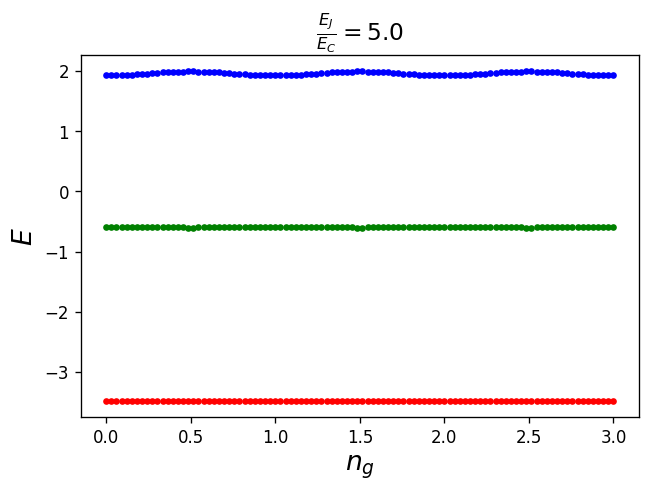

In [74]:
plt.figure(dpi=120)
for ind,n_g in enumerate(n_g_vec):
    plt.scatter(n_g,spec[ind,0],color='r',marker='.')
    plt.scatter(n_g,spec[ind,1],color='g',marker='.')
    plt.scatter(n_g,spec[ind,2],color='b',marker='.')
plt.xlabel(r"$n_g$",fontsize=16)
plt.ylabel(r"$E$",fontsize=16)
plt.title(r"$\frac{E_J}{E_C} = $" + "{:.1f}".format(E_J/E_C),fontsize=14)